[1] "first three components explain nearly 60% of the data"


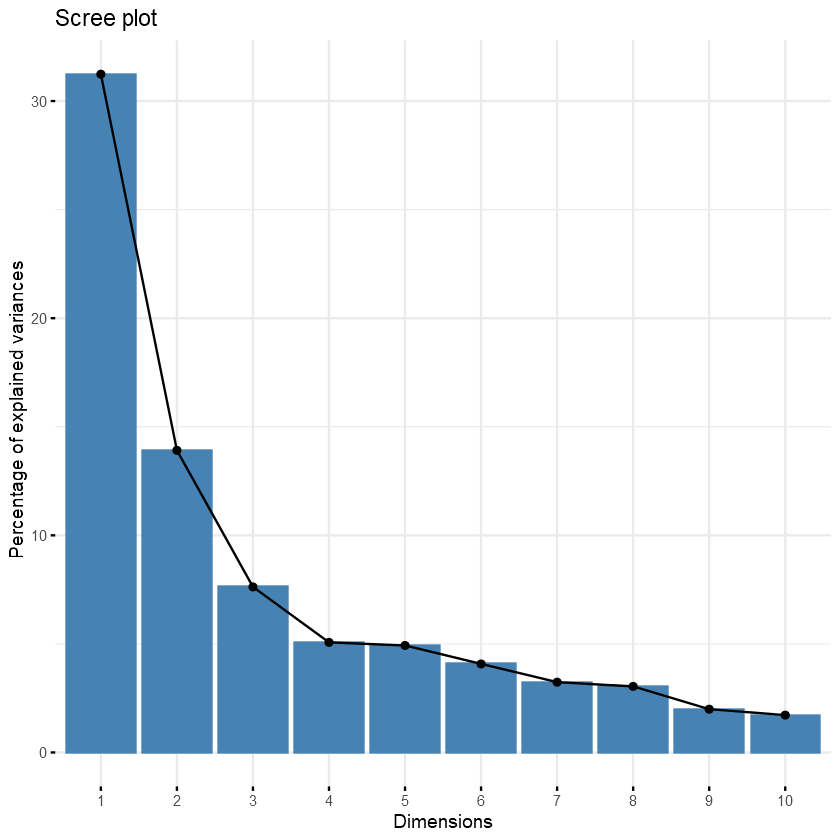

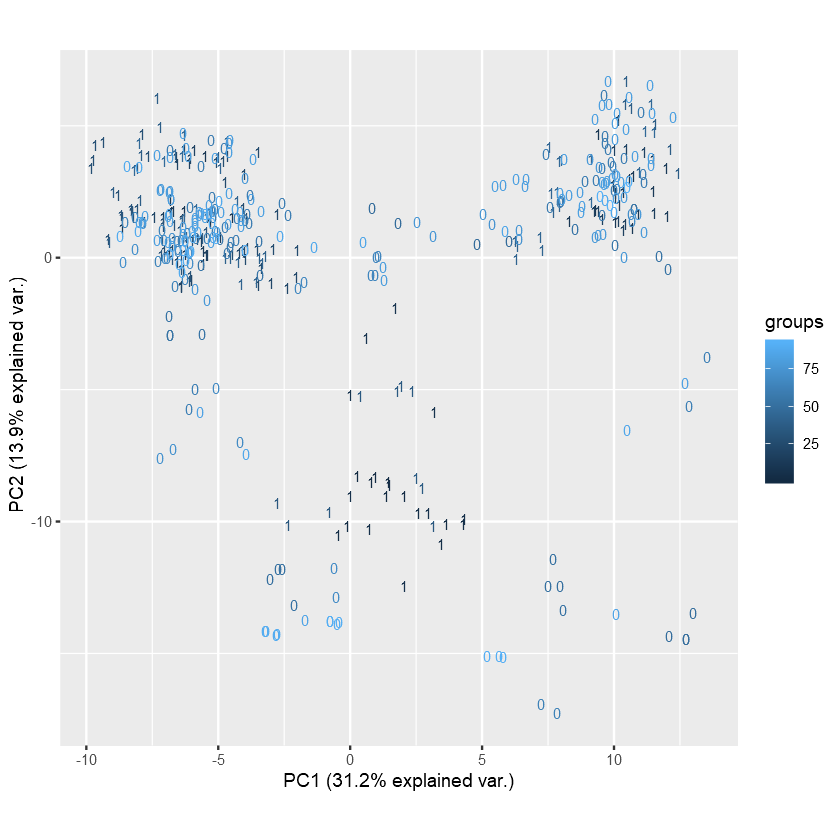

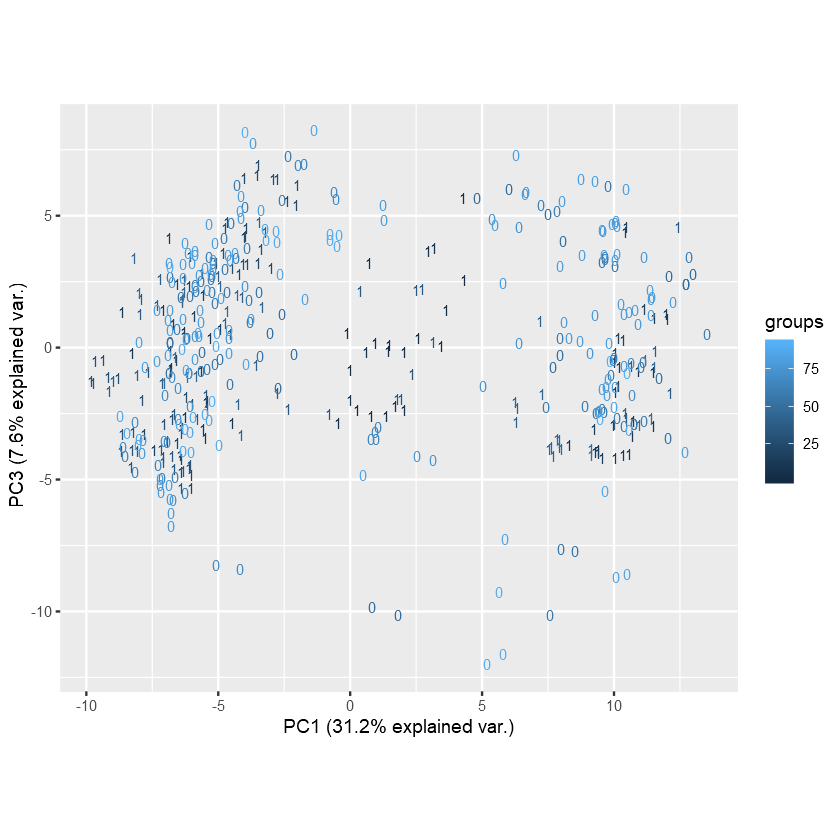

[1] "how good is the assumption of the instance labels’ being as the same as bag labels?"
[1] "The assumption does not work well since the labels do not contruct seperate regions"
[1] "there is no a distinct cluster and the results are not interpretable"


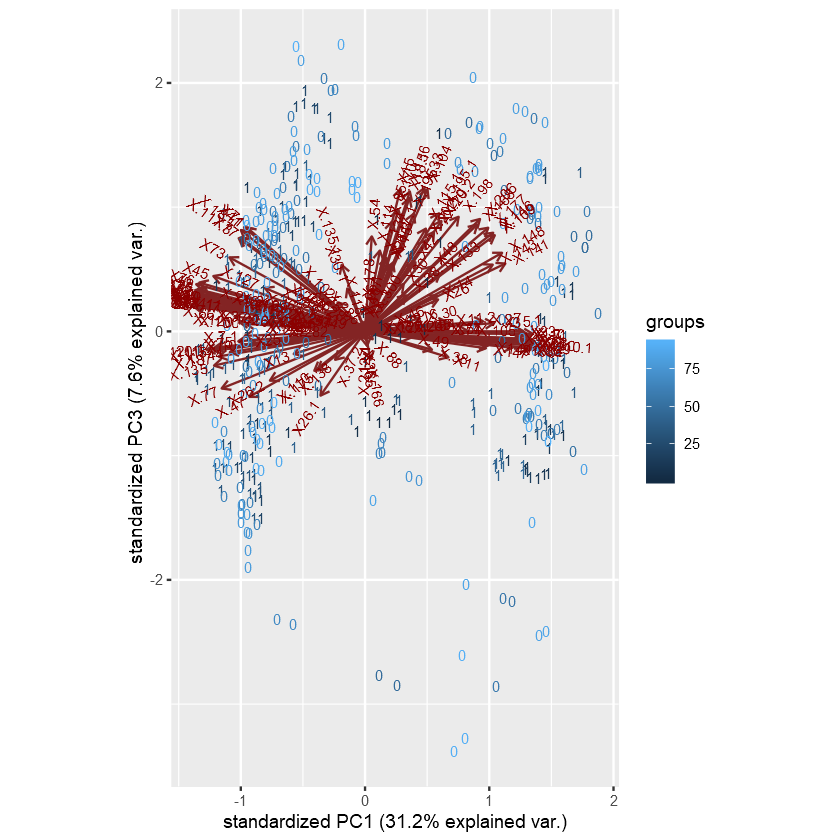

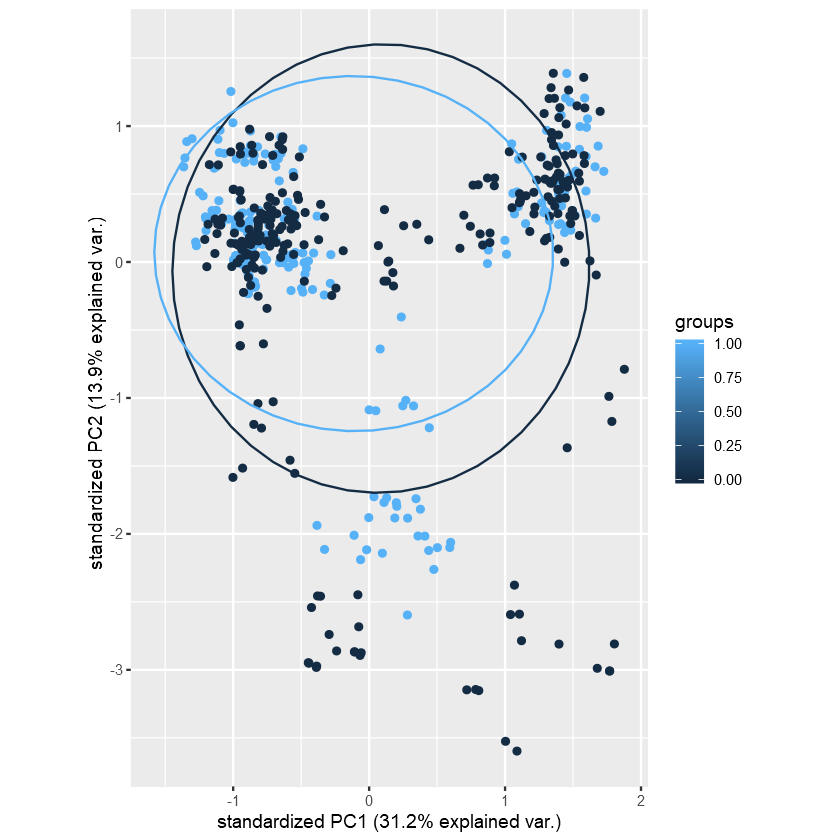

[1] "as it can be seen from the figures, elipses of label 1 and label 0 intersect completely"


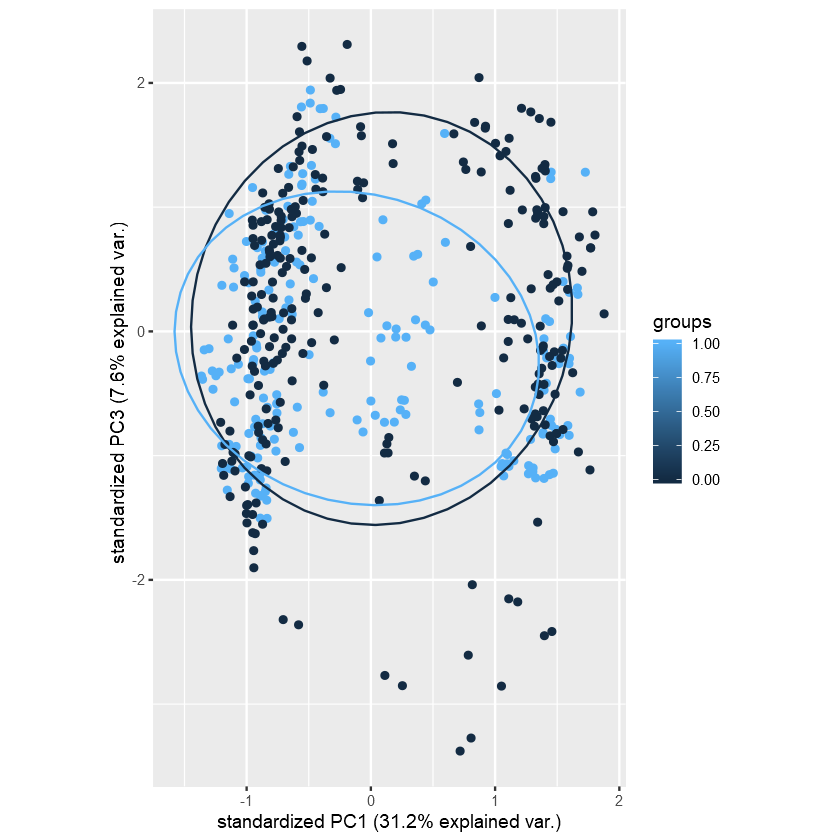

[1] "MDS shows 8 clusters, only yellow cluster consists of label 0, others are mixed."


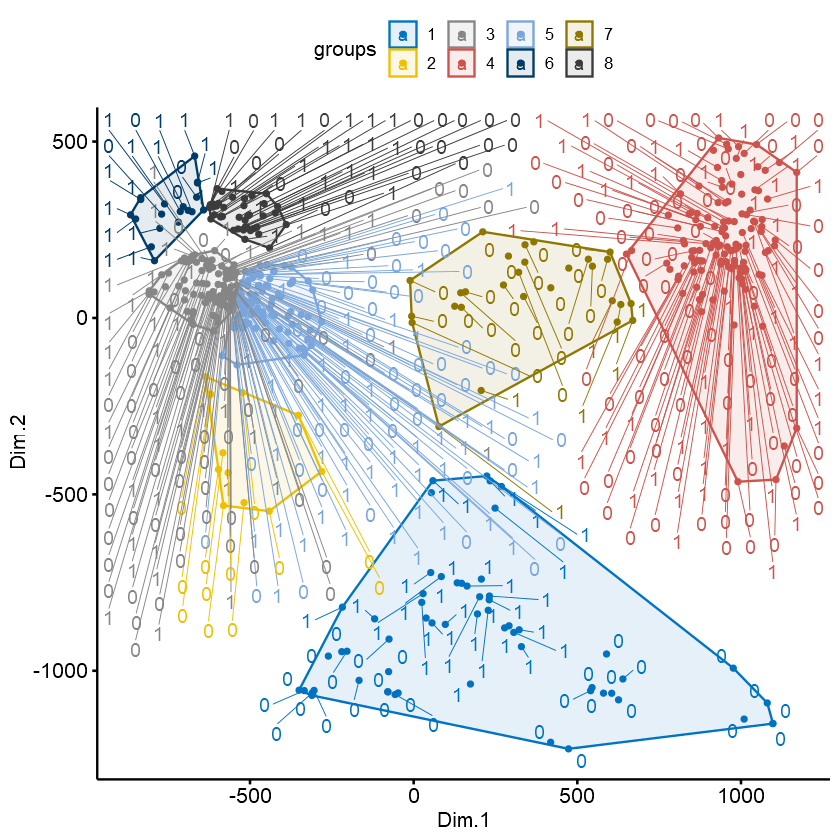

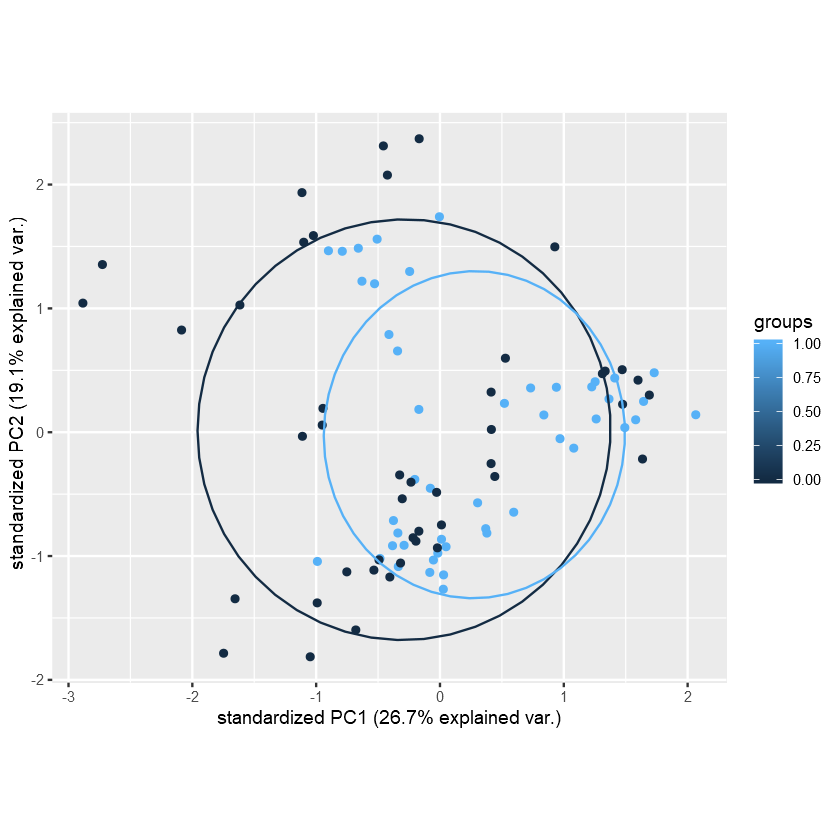

[1] "transformation is quite successful especially when it is compared with the previous results"
[1] "but still regions are not completely seperable, we cannot partition one particular cluster"


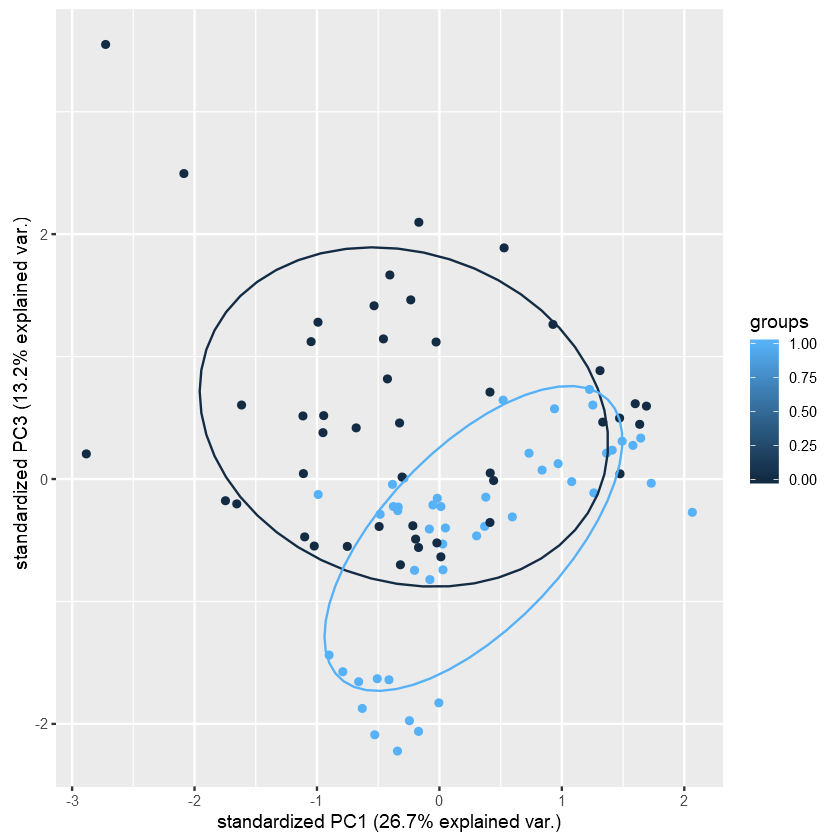

[1] "MDS shows that there is no distinct regions, all clusters consist of mixed label except 1 or 2 clusters"


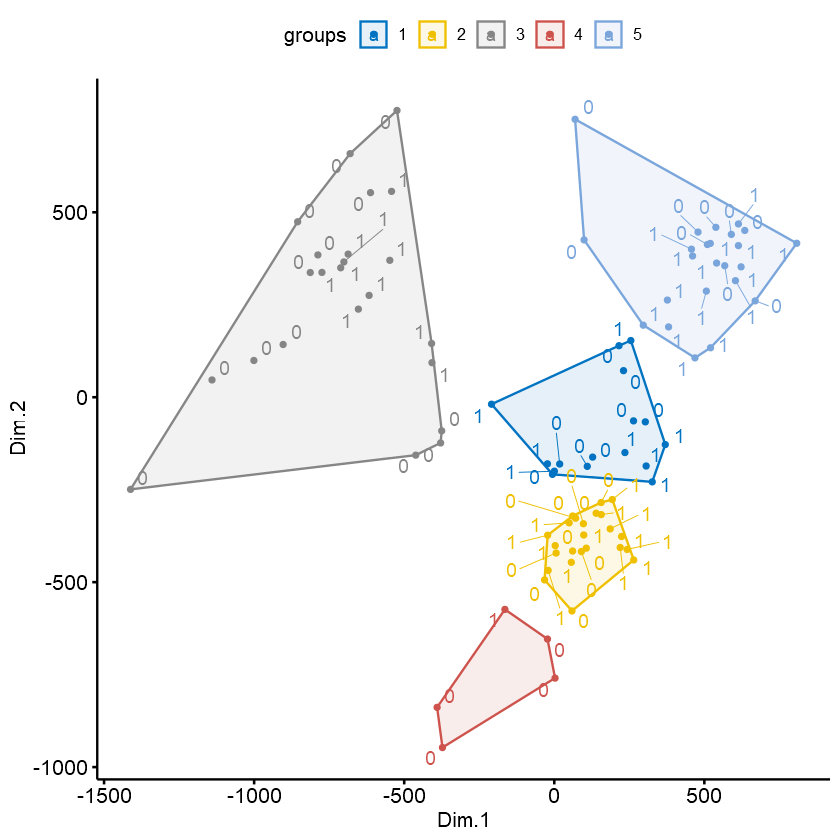

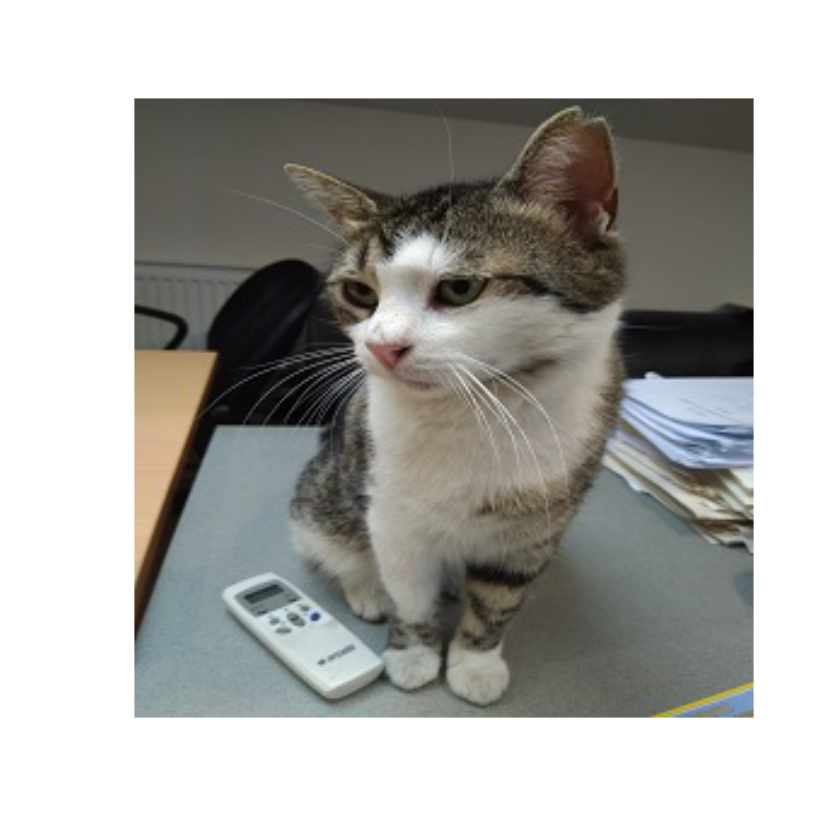

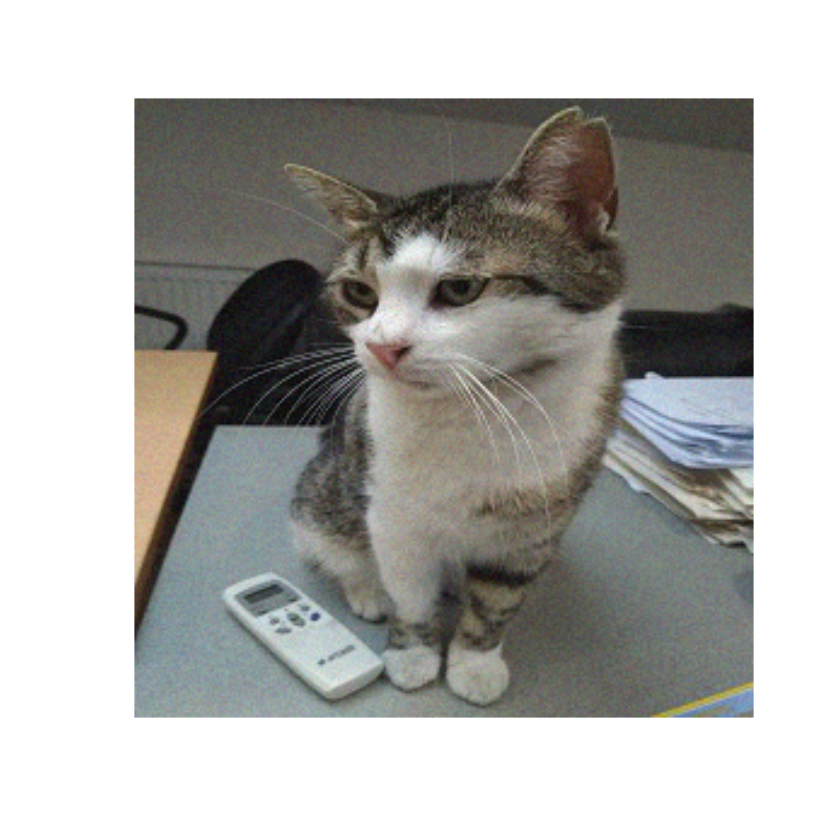

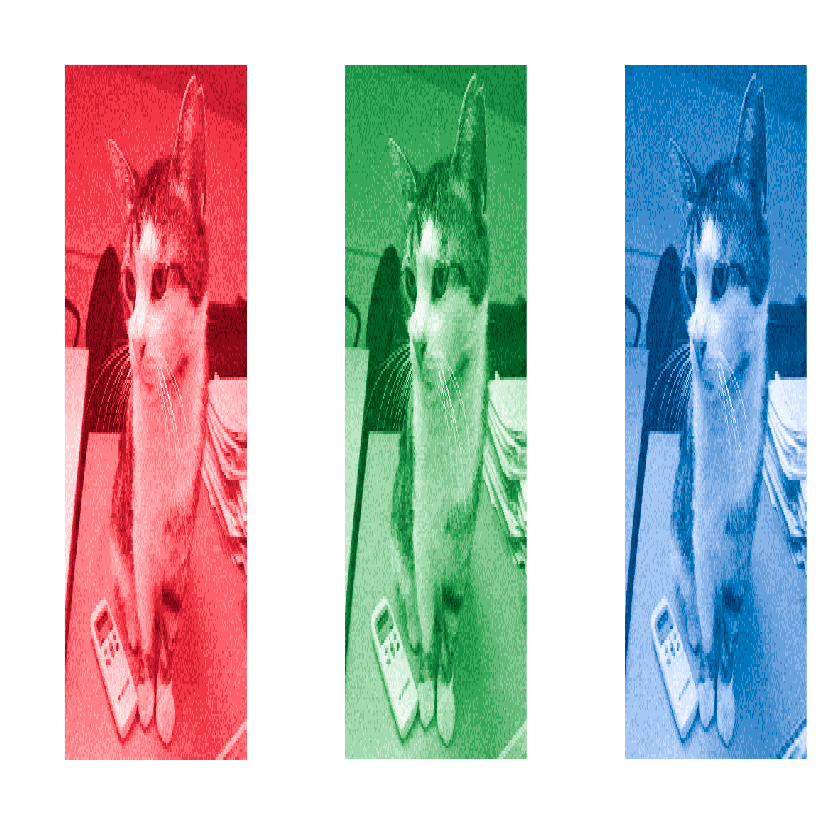

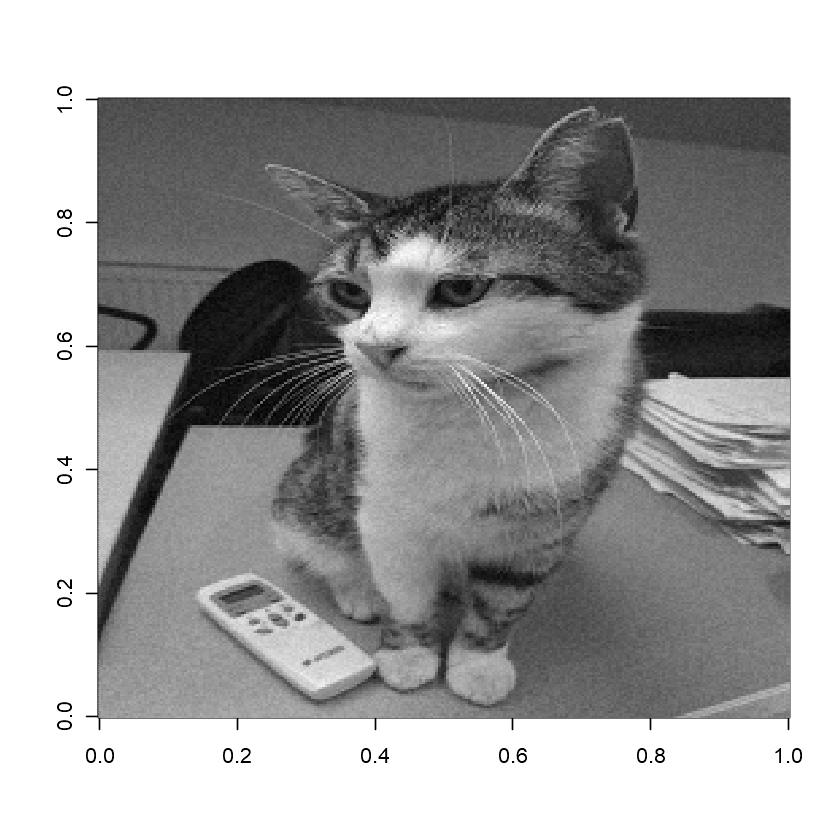

[1] "first 2 components explain more than 60% of the data"


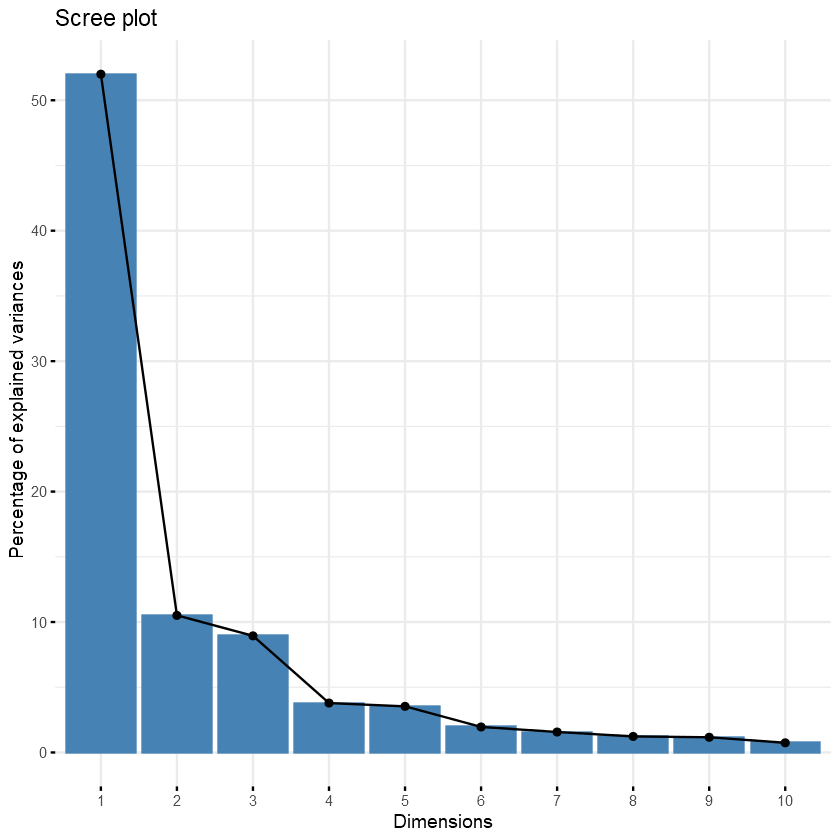

[1] "PCA gives the principal axis where the variance is highest. The darkest regions in the image of first principal axis are the darkest regions"
[1] "the original grey scale image. Eyes of the cat are the second darkest region in the original grey scale image"
[1] "Hence, they become visible in the image of the second principal component."


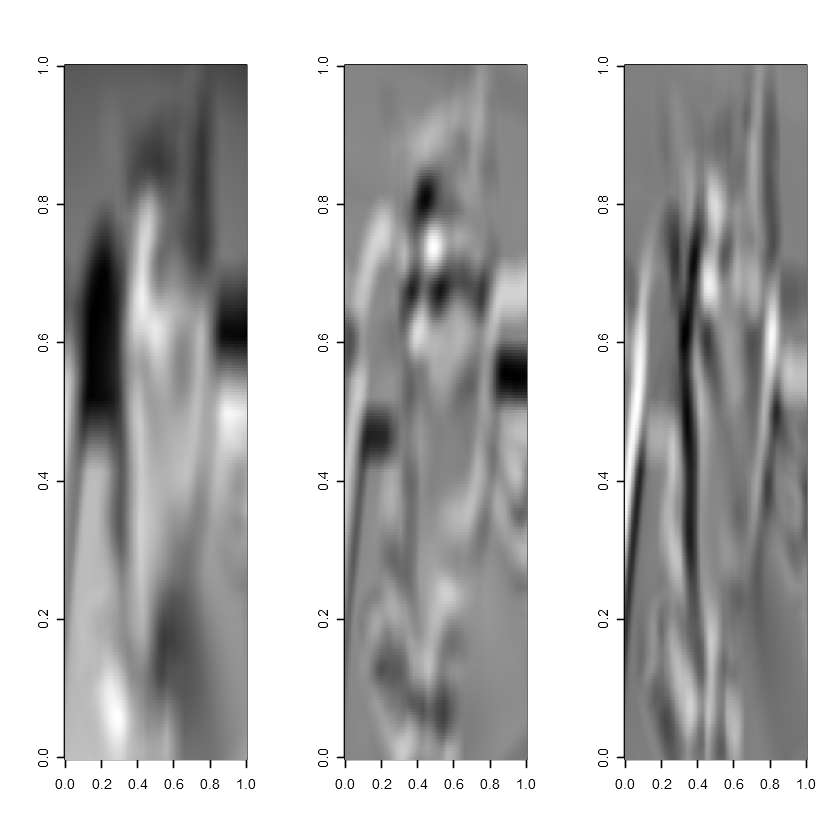

[1] "Images of the eigenvectors show some particular patterns. I do not know  why the patterns are like these but there are distinct patterns"


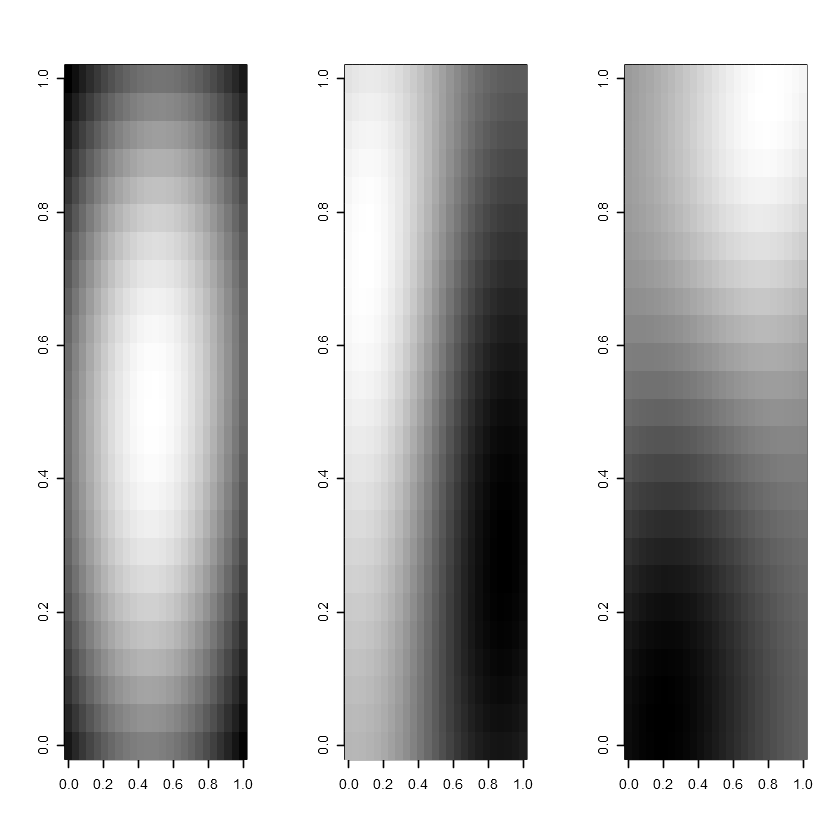

In [5]:
rm(list=ls()) 
library(factoextra)
library(devtools)
library(ggbiplot)
library(rgl)
library(imager)
library(ggplot2)
library(magrittr)
library(dplyr)
library(ggpubr)
library(usethis)
library(plyr)
library(scales)


# 1.a 

musk1 <- read.csv(file="C:/Users/Onur/Desktop/IE 582/HW 2/Musk1_HW2_data/Musk1.csv", header=TRUE, sep=",")

pca_musk1 = princomp(musk1[,3:NCOL(musk1)], cor = TRUE, scores = TRUE)


fviz_eig(pca_musk1)
print("first three components explain nearly 60% of the data")

ggbiplot(pca_musk1, labels=c(musk1[,1]),pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk1[,2]),scale = 0,var.axes=FALSE)

ggbiplot(pca_musk1, labels=c(musk1[,1]),pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk1[,2]),scale = 0,var.axes=FALSE,choices=c(1,3))

ggbiplot(pca_musk1, labels=c(musk1[,1]),pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk1[,2]),scale = 1,var.axes=TRUE,choices=c(1,3))

print("how good is the assumption of the instance labels’ being as the same as bag labels?")
print("The assumption does not work well since the labels do not contruct seperate regions")
print("there is no a distinct cluster and the results are not interpretable")

ggbiplot(pca_musk1,pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk1[,1]),scale = 1,var.axes=FALSE,ellipse=TRUE,choices=c(1,2))

ggbiplot(pca_musk1,pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk1[,1]),scale = 1,var.axes=FALSE,ellipse=TRUE,choices=c(1,3))

print("as it can be seen from the figures, elipses of label 1 and label 0 intersect completely")

mds <- musk1 %>%
  dist() %>%          
  cmdscale() %>%
  as_tibble()
colnames(mds) <- c("Dim.1", "Dim.2")

clust <- kmeans(mds, 8)$cluster %>%
  as.factor()
mds <- mds %>%
  mutate(groups = clust)
ggscatter(mds, x = "Dim.1", y = "Dim.2", 
          label = c(musk1$X1),
          color = "groups",
          palette = "jco",
          size = 1, 
          ellipse = TRUE,
          ellipse.type = "convex",
          repel = TRUE)

print("MDS shows 8 clusters, only yellow cluster consists of label 0, others are mixed.")

# plot3d(f1[,1:3],col=c(musk2$X1))

# 1.b

musk2 = aggregate(musk1[,],by=list(X1.1=musk1$X1.1),data=musk1,FUN=mean)
pca_musk2 = prcomp(musk2[,4:NCOL(musk2)],center = TRUE, scale. = TRUE)


ggbiplot(pca_musk2,pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk2[,2]),scale = 1,var.axes=FALSE,choices=c(1,2),ellipse=TRUE)
ggbiplot(pca_musk2,pc.biplot =
           TRUE,varname.abbrev = FALSE,groups=c(musk2[,2]),scale = 1,var.axes=FALSE,choices=c(1,3),ellipse=TRUE)

print("transformation is quite successful especially when it is compared with the previous results")
print("but still regions are not completely seperable, we cannot partition one particular cluster")

mds2 <- musk2 %>%
  dist() %>%          
  cmdscale() %>%
  as_tibble()
colnames(mds2) <- c("Dim.1", "Dim.2")

clust <- kmeans(mds2, 5)$cluster %>%
  as.factor()
mds2 <- mds2 %>%
  mutate(groups = clust)
ggscatter(mds2, x = "Dim.1", y = "Dim.2", 
          label = c(musk2$X1),
          color = "groups",
          palette = "jco",
          size = 1, 
          ellipse = TRUE,
          ellipse.type = "convex",
          repel = TRUE)

print("MDS shows that there is no distinct regions, all clusters consist of mixed label except 1 or 2 clusters")

# 1.c 


# TASK 2

# 2.1

img2 <- load.image("C:/Users/Onur/Desktop/kedi.jpg")

# 2.2

random_noise=runif(256*256*3,min(img2),0.1*max(img2))
random_noise_3d_array <- array(random_noise,dim=c(256,256,3))

img_noisy <- img2
img_noisy[,,1,] <- img2[,,1,] + random_noise_3d_array

plot(img2,ann=FALSE,axes=FALSE,xlab = "Original Image")
plot(img_noisy,ann=FALSE,axes=FALSE,xlab = "Noisy Image")

par(mfrow=c(1,3))
image(t(apply(img_noisy[,,1], 1, rev)), col = hcl.colors(12, "Reds 3", rev = FALSE),useRaster=FALSE, axes=FALSE)
image(t(apply(img_noisy[,,2], 1, rev)), col = hcl.colors(12, "Greens 3", rev = FALSE),useRaster=TRUE, axes=FALSE)
image(t(apply(img_noisy[,,3], 1, rev)), col = hcl.colors(12, "Blues 3", rev = FALSE), useRaster=TRUE, axes=FALSE)

# 2.3

img_noisy_gray <- grayscale(img_noisy, method = "Luma", drop = TRUE)

par(mfrow=c(1,1))
image(t(apply(img_noisy_gray[,,1,1],1,rev)),col=grey(seq(0,1,length=256)))

patch_size = 25

a = 1
patches = matrix(0,(NROW(img_noisy_gray)-(patch_size-1))^2,patch_size^2)
for(i in 1:(NROW(img_noisy_gray)-(patch_size-1))) {
  for(j in 1:(NCOL(img_noisy_gray)-(patch_size-1))) {
    
    patches_array = unlist(extract_patches(img_noisy_gray, i+floor(patch_size/2), j+floor(patch_size/2), patch_size, patch_size))
    patches[a,] = patches_array  
    a = a+1
  }
}

pca_patches = princomp(patches, cor = TRUE, scores = TRUE)

scores_patches = pca_patches$scores
loadings_patches = pca_patches$loadings
first_component_vector = scores_patches[,1]
first_component_matrix = matrix(first_component_vector,sqrt(NROW(first_component_vector)),sqrt(NROW(first_component_vector)))

fviz_eig(pca_patches)
print("first 2 components explain more than 60% of the data")


par(mfrow=c(1,3))
image(t(apply(first_component_matrix,2,rev)),col=grey(seq(0,1,length=256)))
image(t(apply(matrix(scores_patches[,2],sqrt(NROW(first_component_vector)),sqrt(NROW(first_component_vector))),2,rev)),col=grey(seq(0,1,length=256)))
image(t(apply(matrix(scores_patches[,3],sqrt(NROW(first_component_vector)),sqrt(NROW(first_component_vector))),2,rev)),col=grey(seq(0,1,length=256)))

print("PCA gives the principal axis where the variance is highest. The darkest regions in the image of first principal axis are the darkest regions")
print("the original grey scale image. Eyes of the cat are the second darkest region in the original grey scale image")
print("Hence, they become visible in the image of the second principal component.")


par(mfrow=c(1,3))
image(t(apply(matrix(loadings_patches[,1],sqrt(NROW(loadings_patches)),sqrt(NROW(loadings_patches))),2,rev)),col=grey(seq(0,1,length=256)))
image(t(apply(matrix(loadings_patches[,2],sqrt(NROW(loadings_patches)),sqrt(NROW(loadings_patches))),2,rev)),col=grey(seq(0,1,length=256)))
image(t(apply(matrix(loadings_patches[,3],sqrt(NROW(loadings_patches)),sqrt(NROW(loadings_patches))),2,rev)),col=grey(seq(0,1,length=256)))

print("Images of the eigenvectors show some particular patterns. I do not know  why the patterns are like these but there are distinct patterns")
